In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
colors = ['dodgerblue','salmon','mediumseagreen']

# N=16

In [41]:
S2_PT_PIMC = [0.005691892698593975, 0.009636838705813755, 0.015062560155560118, 0.01937617352802188, 0.024369782563988373, 0.03158634577271469, 0.038252385556628736, 0.04651783847110938, 0.058074764907066735, 0.0654270781026389, 0.079552559018998, 0.08850874985588157, 0.0974312544510353, 0.10227321076633257, 0.10544149725375729, 0.10893025854868353, 0.1086396685771984, 0.11077008347653546,0.11115788431791065]
S2_PT_PIMC_err = [0.0004680672836690142, 0.00045551645649141676, 0.0005416867666976464, 0.0005199398730230718, 0.0004476998001024893, 0.0005011793700754276, 0.0004716230971194503, 0.0005115114958963607, 0.0005464481499913663, 0.0005974417570508704, 0.0006814354534641797, 0.0006821594085345586, 0.0006993876762972921, 0.0007137795730298457, 0.0007673073209149881, 0.0008626620119080441, 0.0009066005560186158, 0.0009054682948270889,0.0010094299797548786]
# betas = [0.6,0.7,0.8,0.9,1.0,1.15,1.30,1.50,1.75,2.0,2.25,2.50,2.75,3.0,3.25,3.50,3.75,4.0,5.0]
betas = [0.6,0.7,0.8,0.9,1.0,1.15,1.30,1.50,1.75,2.0,2.50,3.0,3.50,4.0,4.5,5.0,5.5,6.0,7.0]

S2_PT_exact = 1.125106424045E-01

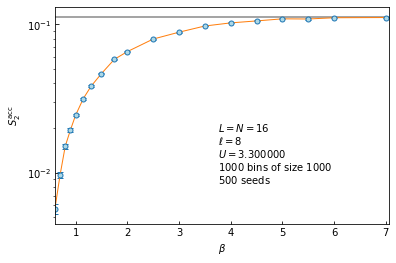

In [42]:
fig,ax1 = plt.subplots()
ax1.errorbar(betas,S2_PT_PIMC, yerr=S2_PT_PIMC_err, fmt='.', capsize=3,ms=10,mfc='lightblue');
ax1.plot(betas,S2_PT_PIMC,lw=1)
ax1.set_ylabel(r'$S_2^{\rm{acc}}$')
ax1.set_xlabel(r'$\beta$')
ax1.annotate(r"$L = N = 16$",(0.55,0.50),xycoords='figure fraction')
ax1.annotate(r"$\ell=8$",(0.55,0.45),xycoords='figure fraction')
ax1.annotate(r"$U=3.300000$",(0.55,0.40),xycoords='figure fraction')
ax1.annotate(r"$1000$ bins of size $1000$",(0.55,0.35),xycoords='figure fraction')
ax1.annotate(r"$500$ seeds",(0.55,0.30),xycoords='figure fraction')
ax1.axhline(S2_PT_exact,color="#888888",zorder=-1)
ax1.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
ax1.tick_params(direction="in")
ax1.set_yscale("log")
plt.savefig("betaScalingS2AccU3.3_N16_loglinear.pdf",dpi=400)
plt.savefig("betaScalingS2AccU3.3_N16_loglinear.png",dpi=400)
plt.plot();

# Relative Errors vs $\beta$

In [43]:
# Load PIMC estimates for various betas
S2_PT_PIMC = np.array(S2_PT_PIMC)
S2_PT_PIMC_err = np.array(S2_PT_PIMC_err)

In [44]:
# Compute relative errors
S2_PT_relErr = (np.abs(S2_PT_PIMC - S2_PT_exact)/S2_PT_exact)

In [45]:
# Compute the error propagation
S2_PT_PIMC_err_err = S2_PT_PIMC_err / S2_PT_exact

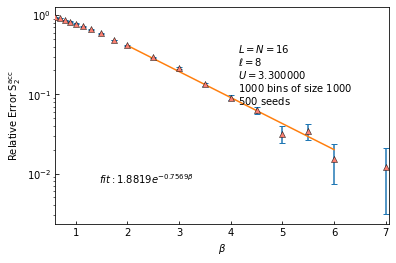

In [46]:
fig,ax1 = plt.subplots()

ax1.errorbar(betas[:],S2_PT_relErr[:], yerr=S2_PT_PIMC_err_err[:], fmt='.', capsize=3,ms=0)
ax1.scatter(betas[:],S2_PT_relErr[:],marker='^',lw=0.47,label=r'$U=3.3$',color=colors[1],ec='black',zorder=10)

ax1.set_ylabel(r'$\rm{Relative} \; \rm{Error} \; S_2^{\rm{acc}}$')
ax1.set_xlabel(r'$\beta$')
ax1.annotate(r"$L = N = 16$",(0.60,0.50+.30),xycoords='figure fraction')
ax1.annotate(r"$\ell=8$",(0.60,0.45+.30),xycoords='figure fraction')
ax1.annotate(r"$U=3.300000$",(0.60,0.40+.30),xycoords='figure fraction')
ax1.annotate(r"$1000$ bins of size $1000$",(0.60,0.35+.30),xycoords='figure fraction')
ax1.annotate(r"$500$ seeds",(0.60,0.30+.30),xycoords='figure fraction')
ax1.axhline(0,color="#888888",zorder=-1)
ax1.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
ax1.set_yscale("log")
ax1.tick_params(direction='in')

# Perform linear fit to ln(y) vs x:
m,lnB = np.polyfit(betas[9:],np.log(S2_PT_relErr)[9:],deg=1)
B = np.exp(lnB)

betas_fit = np.linspace(betas[9],6.0,1000)
ax1.plot(betas_fit,B*np.exp(m*betas_fit))
ax1.annotate(r"$fit: %.4f e^{%.4f \beta}$"%(B,m),(0.25,0.30+.0),xycoords='figure fraction')

plt.savefig("relativeErrorsS2Acc_N16_loglinear.pdf",dpi=400)
plt.savefig("relativeErrorsS2Acc_N16_loglinear.png",dpi=400)
plt.show()

### Perform exponential fit

In [9]:
betas[9]

2.0

# N=8

In [10]:
S2_PT_PIMC = [0.004228529344948448, 0.006796861539848006, 0.011474309808362722, 0.014430683998398695, 0.018227236281010667, 0.023164712948426078, 0.026925930699194033, 0.03115295700101037, 0.03636816787763588, 0.038888598244685615, 0.04162816864280522, 0.04541450518813129, 0.04490759223905994, 0.04353061589669386, 0.046846182250375595, 0.04812119468355578, 0.04704233422806137, 0.047988066307101306, 0.04748417678673687]
S2_PT_PIMC_err = [0.0004926733504204537, 0.0005398783083972107, 0.0004919880577726243, 0.00047529556193817675, 0.000501426523367647, 0.0005083305948853155, 0.0005677262219122175, 0.0006062008066807878, 0.0006137144330321958, 0.0007198103140660993, 0.0007368345659231626, 0.0007276987611748398, 0.0008086621302987588, 0.0009167936600457056, 0.0008098629610613425, 0.0008807892741566078, 0.001024740988725566, 0.0009121614308528563, 0.0010948846275463968]
betas = [0.6, 0.7, 0.8, 0.9, 1.0, 1.15, 1.3, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 5.0]

S2_PT_exact = 0.04786463276686823

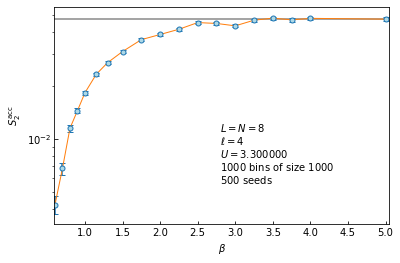

In [11]:
fig,ax1 = plt.subplots()
ax1.errorbar(betas,S2_PT_PIMC, yerr=S2_PT_PIMC_err, fmt='.', capsize=3,ms=10,mfc='lightblue');
ax1.plot(betas,S2_PT_PIMC,lw=1)
ax1.set_ylabel(r'$S_2^{\rm{acc}}$')
ax1.set_xlabel(r'$\beta$')
ax1.annotate(r"$L = N = 8$",(0.55,0.50),xycoords='figure fraction')
ax1.annotate(r"$\ell=4$",(0.55,0.45),xycoords='figure fraction')
ax1.annotate(r"$U=3.300000$",(0.55,0.40),xycoords='figure fraction')
ax1.annotate(r"$1000$ bins of size $1000$",(0.55,0.35),xycoords='figure fraction')
ax1.annotate(r"$500$ seeds",(0.55,0.30),xycoords='figure fraction')
ax1.axhline(S2_PT_exact,color="#888888",zorder=-1)
ax1.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
ax1.tick_params(direction="in")
ax1.set_yscale("log")
plt.savefig("betaScalingS2AccU3.3_N8_loglinear.pdf",dpi=400)
plt.savefig("betaScalingS2AccU3.3_N8_loglinear.png",dpi=400)
plt.plot();

# Relative Errors vs $\beta$

In [12]:
# Load PIMC estimates for various betas
S2_PT_PIMC = np.array(S2_PT_PIMC)
S2_PT_PIMC_err = np.array(S2_PT_PIMC_err)

In [13]:
# Compute relative errors
S2_PT_relErr = (np.abs(S2_PT_PIMC - S2_PT_exact)/S2_PT_exact)

In [14]:
# Compute the error propagation
S2_PT_PIMC_err_err = S2_PT_PIMC_err / S2_PT_exact

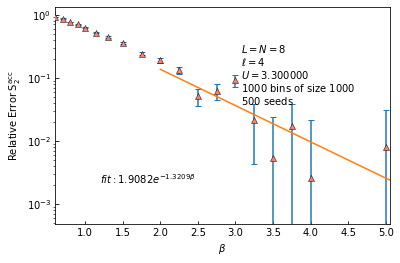

In [15]:
fig,ax1 = plt.subplots()

ax1.errorbar(betas[:],S2_PT_relErr[:], yerr=S2_PT_PIMC_err_err[:], fmt='.', capsize=3,ms=0)
ax1.scatter(betas[:],S2_PT_relErr[:],marker='^',lw=0.47,label=r'$U=3.3$',color=colors[1],ec='black',zorder=10)

ax1.set_ylabel(r'$\rm{Relative} \; \rm{Error} \; S_2^{\rm{acc}}$')
ax1.set_xlabel(r'$\beta$')
ax1.annotate(r"$L = N = 8$",(0.60,0.50+.30),xycoords='figure fraction')
ax1.annotate(r"$\ell=4$",(0.60,0.45+.30),xycoords='figure fraction')
ax1.annotate(r"$U=3.300000$",(0.60,0.40+.30),xycoords='figure fraction')
ax1.annotate(r"$1000$ bins of size $1000$",(0.60,0.35+.30),xycoords='figure fraction')
ax1.annotate(r"$500$ seeds",(0.60,0.30+.30),xycoords='figure fraction')
ax1.axhline(0,color="#888888",zorder=-1)
ax1.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
ax1.set_yscale("log")
ax1.tick_params(direction='in')

# Perform linear fit to ln(y) vs x:
m,lnB = np.polyfit(betas[9:],np.log(S2_PT_relErr)[9:],deg=1)
B = np.exp(lnB)

betas_fit = np.linspace(betas[9],6.0,1000)
ax1.plot(betas_fit,B*np.exp(m*betas_fit))
ax1.annotate(r"$fit: %.4f e^{%.4f \beta}$"%(B,m),(0.25,0.30+.0),xycoords='figure fraction')

plt.savefig("relativeErrorsS2Acc_N8_loglinear.pdf",dpi=400)
plt.savefig("relativeErrorsS2Acc_N8_loglinear.png",dpi=400)
plt.show()

In [16]:
betas[9]

2.0

# N=4

In [30]:
S2_PT_PIMC = [0.0016740790672858173, 0.0018031148654581838, 0.005143487220869563, 0.005604285956371991, 0.005107799041206232, 0.006204303364249597, 0.008362704084278638, 0.007330917439332395, 0.008700321751241618, 0.008379312681925427, 0.010467065103196827, 0.010321259467986873]
S2_PT_PIMC_err = [0.0004924176459154418, 0.0005630634136507626, 0.000513466926002732, 0.0005746512879748572, 0.0005237628620680345, 0.0005818843465781484, 0.0005640514806233521, 0.0006379809472701952, 0.0006244085721860448, 0.0006976970750077739, 0.0007649691798404555, 0.0009795553586566933]
betas = [0.6, 0.7, 0.8, 0.9, 1.0, 1.15, 1.3, 1.5, 1.75, 2.0, 3.0, 4.0]

S2_PT_exact = 0.009555651122495533

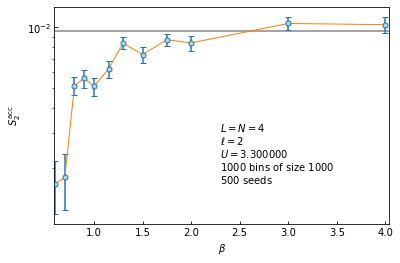

In [34]:
fig,ax1 = plt.subplots()
ax1.errorbar(betas,S2_PT_PIMC, yerr=S2_PT_PIMC_err, fmt='.', capsize=3,ms=10,mfc='lightblue');
ax1.plot(betas,S2_PT_PIMC,lw=1)
ax1.set_ylabel(r'$S_2^{\rm{acc}}$')
ax1.set_xlabel(r'$\beta$')
ax1.annotate(r"$L = N = 4$",(0.55,0.50),xycoords='figure fraction')
ax1.annotate(r"$\ell=2$",(0.55,0.45),xycoords='figure fraction')
ax1.annotate(r"$U=3.300000$",(0.55,0.40),xycoords='figure fraction')
ax1.annotate(r"$1000$ bins of size $1000$",(0.55,0.35),xycoords='figure fraction')
ax1.annotate(r"$500$ seeds",(0.55,0.30),xycoords='figure fraction')
ax1.axhline(S2_PT_exact,color="#888888",zorder=-1)
ax1.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
ax1.tick_params(direction="in")
ax1.set_yscale("log")
plt.savefig("betaScalingS2AccU3.3_N4_loglinear.pdf",dpi=400)
plt.savefig("betaScalingS2AccU3.3_N4_loglinear.png",dpi=400)
plt.plot();

# Relative Errors vs $\beta$

In [35]:
# Load PIMC estimates for various betas
S2_PT_PIMC = np.array(S2_PT_PIMC)
S2_PT_PIMC_err = np.array(S2_PT_PIMC_err)

In [36]:
# Compute relative errors
S2_PT_relErr = (np.abs(S2_PT_PIMC - S2_PT_exact)/S2_PT_exact)

In [37]:
# Compute the error propagation
S2_PT_PIMC_err_err = S2_PT_PIMC_err / S2_PT_exact

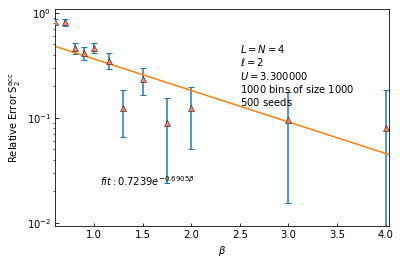

In [40]:
fig,ax1 = plt.subplots()

ax1.errorbar(betas[:],S2_PT_relErr[:], yerr=S2_PT_PIMC_err_err[:], fmt='.', capsize=3,ms=0)
ax1.scatter(betas[:],S2_PT_relErr[:],marker='^',lw=0.47,label=r'$U=3.3$',color=colors[1],ec='black',zorder=10)

ax1.set_ylabel(r'$\rm{Relative} \; \rm{Error} \; S_2^{\rm{acc}}$')
ax1.set_xlabel(r'$\beta$')
ax1.annotate(r"$L = N = 4$",(0.60,0.50+.30),xycoords='figure fraction')
ax1.annotate(r"$\ell=2$",(0.60,0.45+.30),xycoords='figure fraction')
ax1.annotate(r"$U=3.300000$",(0.60,0.40+.30),xycoords='figure fraction')
ax1.annotate(r"$1000$ bins of size $1000$",(0.60,0.35+.30),xycoords='figure fraction')
ax1.annotate(r"$500$ seeds",(0.60,0.30+.30),xycoords='figure fraction')
ax1.axhline(0,color="#888888",zorder=-1)
ax1.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
ax1.set_yscale("log")
ax1.tick_params(direction='in')

# Perform linear fit to ln(y) vs x:
m,lnB = np.polyfit(betas[0:],np.log(S2_PT_relErr)[0:],deg=1)
B = np.exp(lnB)

betas_fit = np.linspace(betas[0],6.0,1000)
ax1.plot(betas_fit,B*np.exp(m*betas_fit))
ax1.annotate(r"$fit: %.4f e^{%.4f \beta}$"%(B,m),(0.25,0.30+.0),xycoords='figure fraction')

plt.savefig("relativeErrorsS2Acc_N4_loglinear.pdf",dpi=400)
plt.savefig("relativeErrorsS2Acc_N4_loglinear.png",dpi=400)
plt.show()

In [29]:
betas[]

2.0